# Exponential distibution

In [1]:
# my own func
import random 
import math

def expon(lam, n):
    lst = []
    for i in range(n):
        r = random.random()
        x = -math.log(r,math.e) / lam
        lst.append(float('{:.2f}'.format(x)))
    
    return lst
    
# Создание m массивов выборки
def make_vibor_exp(lam, m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(expon(lam, m))
        
    l = 1
    print('Реализация выборки экспоненциального распределени объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    return A

<font color='red'> Моделирование выбранных случайных величин </font>

In [19]:
make_vibor_exp(0.1, 5)

Реализация выборки экспоненциального распределени объема 5: 

1): [6.8, 8.87, 4.05, 7.33, 8.5]
2): [2.47, 4.11, 8.82, 12.82, 2.63]
3): [21.41, 5.13, 14.58, 14.41, 1.86]
4): [26.62, 5.43, 25.14, 4.77, 6.53]
5): [14.35, 1.79, 4.8, 2.95, 2.96]


[[[6.8, 8.87, 4.05, 7.33, 8.5]],
 [[2.47, 4.11, 8.82, 12.82, 2.63]],
 [[21.41, 5.13, 14.58, 14.41, 1.86]],
 [[26.62, 5.43, 25.14, 4.77, 6.53]],
 [[14.35, 1.79, 4.8, 2.95, 2.96]]]

In [20]:
make_vibor_exp(0.1, 10)

Реализация выборки экспоненциального распределени объема 10: 

1): [13.09, 1.96, 2.08, 3.38, 6.32, 10.56, 19.55, 4.73, 1.99, 5.26]
2): [8.61, 12.9, 12.63, 2.0, 13.55, 24.12, 2.99, 10.89, 0.94, 5.52]
3): [14.83, 0.92, 6.12, 10.23, 9.63, 11.85, 1.71, 2.68, 2.23, 1.92]
4): [30.82, 3.75, 4.27, 4.03, 4.74, 12.96, 0.34, 12.99, 10.11, 9.32]
5): [6.34, 3.49, 8.41, 34.44, 2.45, 1.67, 8.66, 6.01, 23.6, 1.64]


[[[13.09, 1.96, 2.08, 3.38, 6.32, 10.56, 19.55, 4.73, 1.99, 5.26]],
 [[8.61, 12.9, 12.63, 2.0, 13.55, 24.12, 2.99, 10.89, 0.94, 5.52]],
 [[14.83, 0.92, 6.12, 10.23, 9.63, 11.85, 1.71, 2.68, 2.23, 1.92]],
 [[30.82, 3.75, 4.27, 4.03, 4.74, 12.96, 0.34, 12.99, 10.11, 9.32]],
 [[6.34, 3.49, 8.41, 34.44, 2.45, 1.67, 8.66, 6.01, 23.6, 1.64]]]

In [ ]:
#make_vibor_exp(0.1, 100)

In [ ]:
#make_vibor_exp(0.1, 1000)

In [16]:
#make_vibor_exp(0.1, 10000)

<font color='red'> Построение эмпирической функции распределения </font> 

In [5]:
import pylab
import math 
import matplotlib
import numpy as np
import scipy.stats as sc
from random import randint
import matplotlib.pyplot as plt

def make_efr_expon(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
            
                final_sum += lst[index][1]

                x0, y0 = [-2, lst[0][0]], [0,0]
                x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

               

                plt.grid(True) #Сетка
                plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

    

        plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
        pylab.legend ()
        #plt.show()

    return upper_list





def make_сdf_expon(lam):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sc.expon.ppf(0.01), sc.expon.ppf(0.99), 10000)
    

    ax.plot(x, sc.expon.cdf(x),'r-', lw=5, alpha = 0.6, label='expon cdf')

    rv = sc.expon()
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, abs(fin))
    
    

Реализация выборки экспоненциального распределени объема 5: 

1): [9.23, 3.34, 7.0, 7.58, 4.43]
2): [9.34, 0.71, 21.18, 0.32, 0.6]
3): [8.34, 5.51, 20.42, 17.35, 23.41]
4): [1.16, 24.61, 2.58, 1.84, 2.99]
5): [6.94, 1.52, 25.47, 5.64, 3.44]


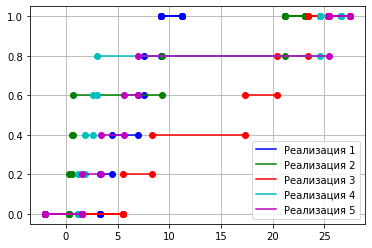

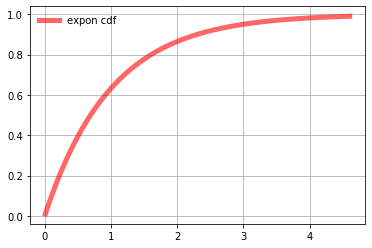

In [18]:
M = make_vibor_exp(0.1, 5)
make_efr_expon(M, 5)
make_сdf_expon(0.9)

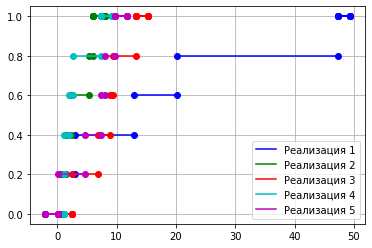

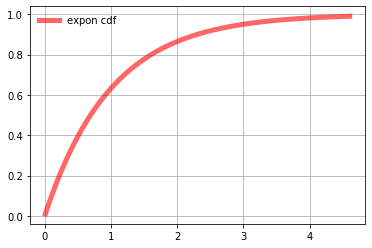

In [ ]:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()